<a href="https://colab.research.google.com/github/facumdito/final-pavon/blob/main/Copia_de_Copia_de_Final_Pavon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Librerías para manipulación de datos
import numpy as np
import pandas as pd

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Modelos de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Evaluación de modelos
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Cargar los datos desde el archivo CSV
Student_data = pd.read_csv('Student Alcohol Consumption_TF.csv')



In [ ]:
# Mostrar las primeras filas del dataset para entender su estructura
print("Primeras 5 filas del dataset:")
Student_data.head()



Primeras 5 filas del dataset:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
# Verificar si hay valores nulos
print("\nValores nulos por columna:")
Student_data.isnull().sum()


Valores nulos por columna:


,0
school,0
sex,0
age,31
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [ ]:
# 1. ¿Cuántos estudiantes hay en total en el dataset?
total_student = len(Student_data)
print(f"Total de pasajeros en el dataset: {total_student}")



Total de pasajeros en el dataset: 1044


Primeras filas del dataset:
  school sex   age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F  18.0       U     GT3       A     4     4  at_home   teacher   
1     GP   F  17.0       U     GT3       T     1     1  at_home     other   
2     GP   F  15.0       U     LE3       T     1     1  at_home     other   
3     GP   F  15.0       U     GT3       T     4     2   health  services   
4     GP   F  16.0       U     GT3       T     3     3    other     other   

   ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0  ...      4        3      4     1     1      3        6   5   6   6  
1  ...      5        3      3     1     1      3        4   5   5   6  
2  ...      4        3      2     2     3      3       10   7   8  10  
3  ...      3        2      2     1     1      5        2  15  14  15  
4  ...      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

Resumen de variables:
<class 'pandas.core.frame.DataF

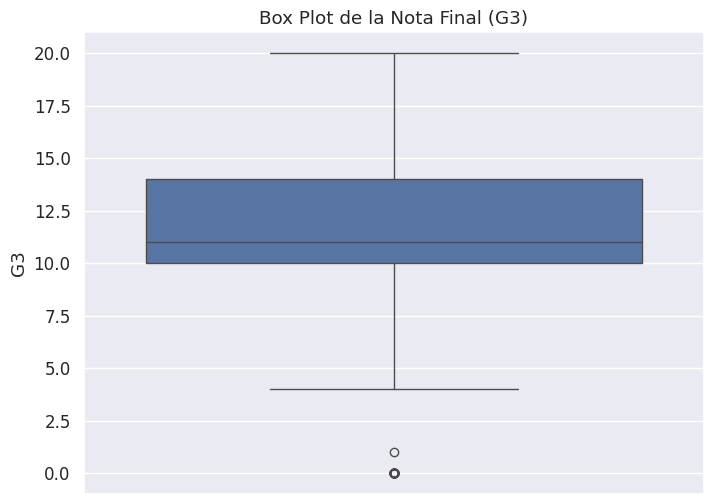

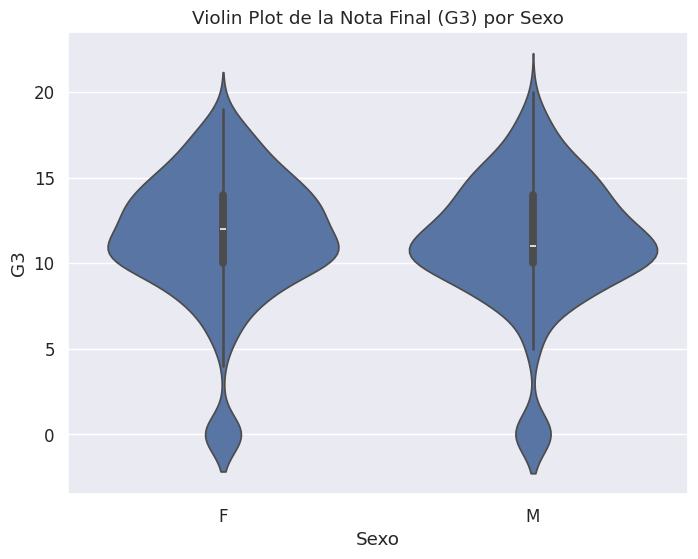

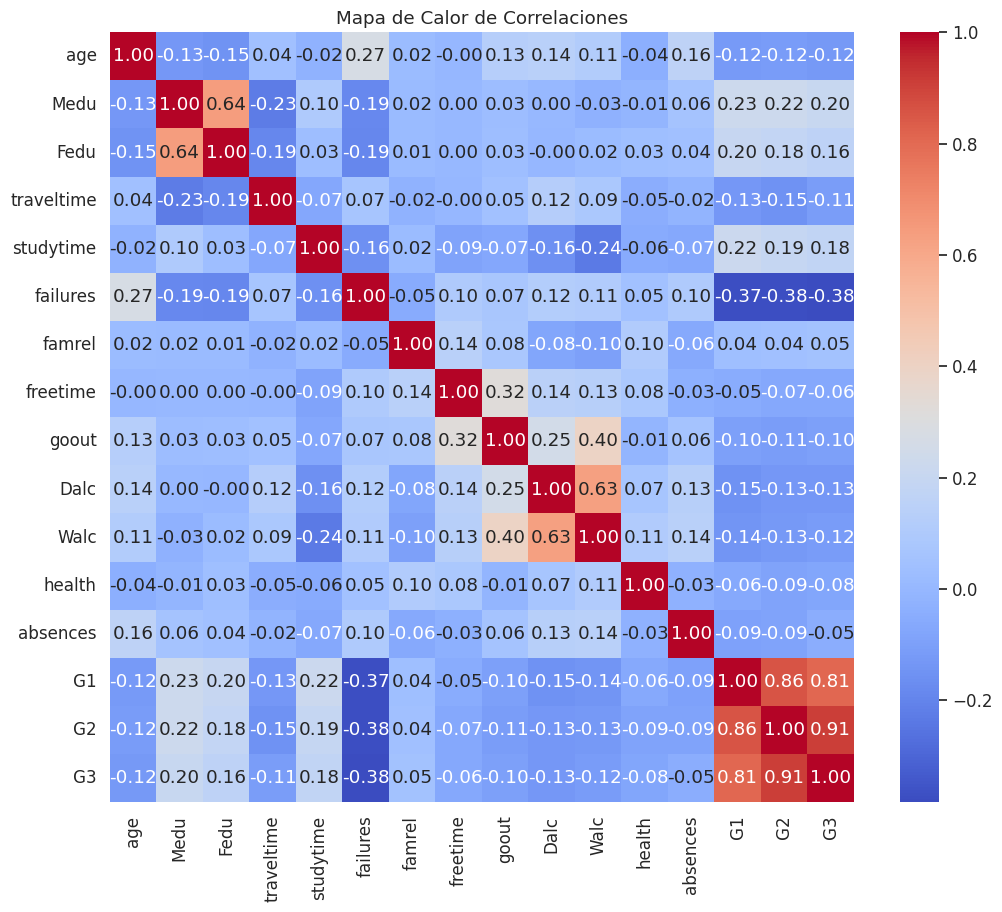

Valores faltantes por columna:
school          0
sex             0
age            31
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime    104
studytime      52
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic        0
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences        0
G1              0
G2              0
G3              0
dtype: int64

Distribución de la variable 'performance':
performance
alto    814
bajo    230
Name: count, dtype: int64

Dimensiones de las características finales: (1044, 39)

Tamaño del conjunto de entrenamiento: (730, 39)
Tamaño del conjunto de prueba: (314, 39)


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [3]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de gráficos
sns.set_style("whitegrid")
sns.set(font_scale=1.1)

# Cargar el dataset
data = pd.read_csv("Student Alcohol Consumption_TF.csv")
print("Primeras filas del dataset:")
print(data.head())
print("\nResumen de variables:")
print(data.info())
print("\nEstadísticas descriptivas:")
print(data.describe())

# -----------------------
# Visualización exploratoria
# -----------------------

# 1. Box Plot para la nota final (G3)
plt.figure(figsize=(8,6))
sns.boxplot(y=data['G3'])
plt.title("Box Plot de la Nota Final (G3)")
plt.ylabel("G3")
plt.show()

# 2. Violin Plot de G3 por sexo para detectar diferencias en la distribución
plt.figure(figsize=(8,6))
sns.violinplot(x='sex', y='G3', data=data)
plt.title("Violin Plot de la Nota Final (G3) por Sexo")
plt.xlabel("Sexo")
plt.ylabel("G3")
plt.show()

# 3. Mapa de calor con la matriz de correlaciones entre variables numéricas
plt.figure(figsize=(12,10))
# Select only numeric columns before calculating correlation
numeric_data = data.select_dtypes(include=np.number)
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mapa de Calor de Correlaciones")
plt.show()

# -----------------------
# Limpieza y preparación de los datos
# -----------------------
# Revisar valores faltantes
print("Valores faltantes por columna:")
print(data.isnull().sum())

# Crear variable objetivo.
# En este ejemplo se define "alto" si la nota final (G3) es >= 10, "bajo" en caso contrario.
data['performance'] = data['G3'].apply(lambda x: 'alto' if x >= 10 else 'bajo')

print("\nDistribución de la variable 'performance':")
print(data['performance'].value_counts())

# Definir la variable a predecir y las características.
# Para evitar fuga de información se eliminan G1, G2 y G3.
features = data.drop(['G1', 'G2', 'G3', 'performance'], axis=1)
target = data['performance']

# Convertir variables categóricas a numéricas mediante one-hot encoding.
features_encoded = pd.get_dummies(features, drop_first=True)

print("\nDimensiones de las características finales:", features_encoded.shape)

# -----------------------
# Separar conjunto de entrenamiento y prueba
# -----------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_encoded, target,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=target)
print("\nTamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

# -----------------------
# Modelado de Machine Learning Supervisado
# Modelos: Regresión Logística y Random Forest
# -----------------------

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Modelo 1: Regresión Logística
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

print("\nReporte de clasificación - Regresión Logística:")
print(classification_report(y_test, y_pred_log))

# Plot de Matriz de Confusión para Regresión Logística
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6,4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap='Blues',
            xticklabels=['bajo', 'alto'], yticklabels=['bajo', 'alto'])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

# Modelo 2: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nReporte de clasificación - Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Plot de Matriz de Confusión para Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap='Greens',
            xticklabels=['bajo', 'alto'], yticklabels=['bajo', 'alto'])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Random Forest")
plt.show()

# Comparación de la precisión de cada modelo
acc_log = accuracy_score(y_test, y_pred_log)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("Accuracy Regresión Logística: {:.2f}%".format(acc_log*100))
print("Accuracy Random Forest: {:.2f}%".format(acc_rf*100))


### Explicación del flujo de trabajo

Primeras filas del dataset:
  school sex   age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F  18.0       U     GT3       A     4     4  at_home   teacher   
1     GP   F  17.0       U     GT3       T     1     1  at_home     other   
2     GP   F  15.0       U     LE3       T     1     1  at_home     other   
3     GP   F  15.0       U     GT3       T     4     2   health  services   
4     GP   F  16.0       U     GT3       T     3     3    other     other   

   ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0  ...      4        3      4     1     1      3        6   5   6   6  
1  ...      5        3      3     1     1      3        4   5   5   6  
2  ...      4        3      2     2     3      3       10   7   8  10  
3  ...      3        2      2     1     1      5        2  15  14  15  
4  ...      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

Resumen de variables:
<class 'pandas.core.frame.DataF

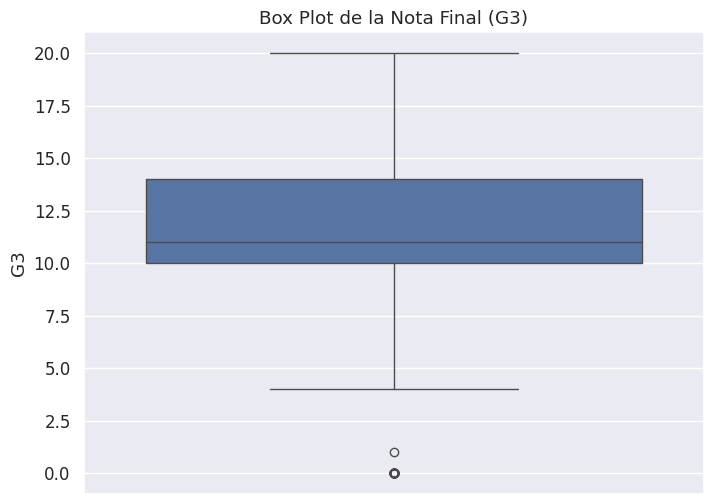

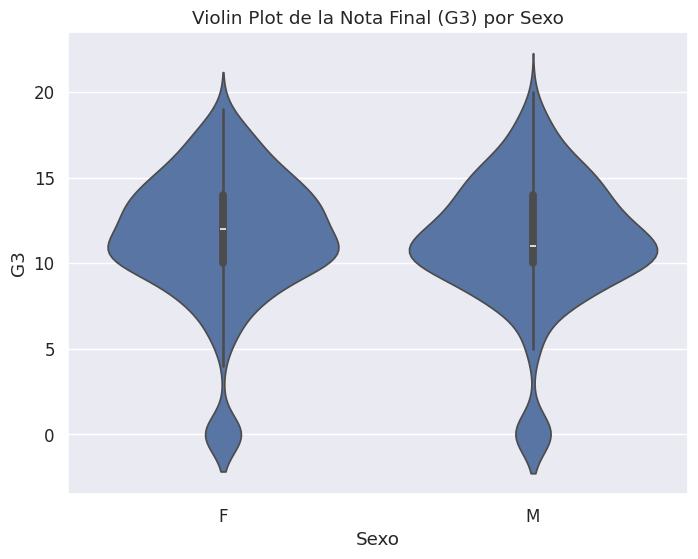

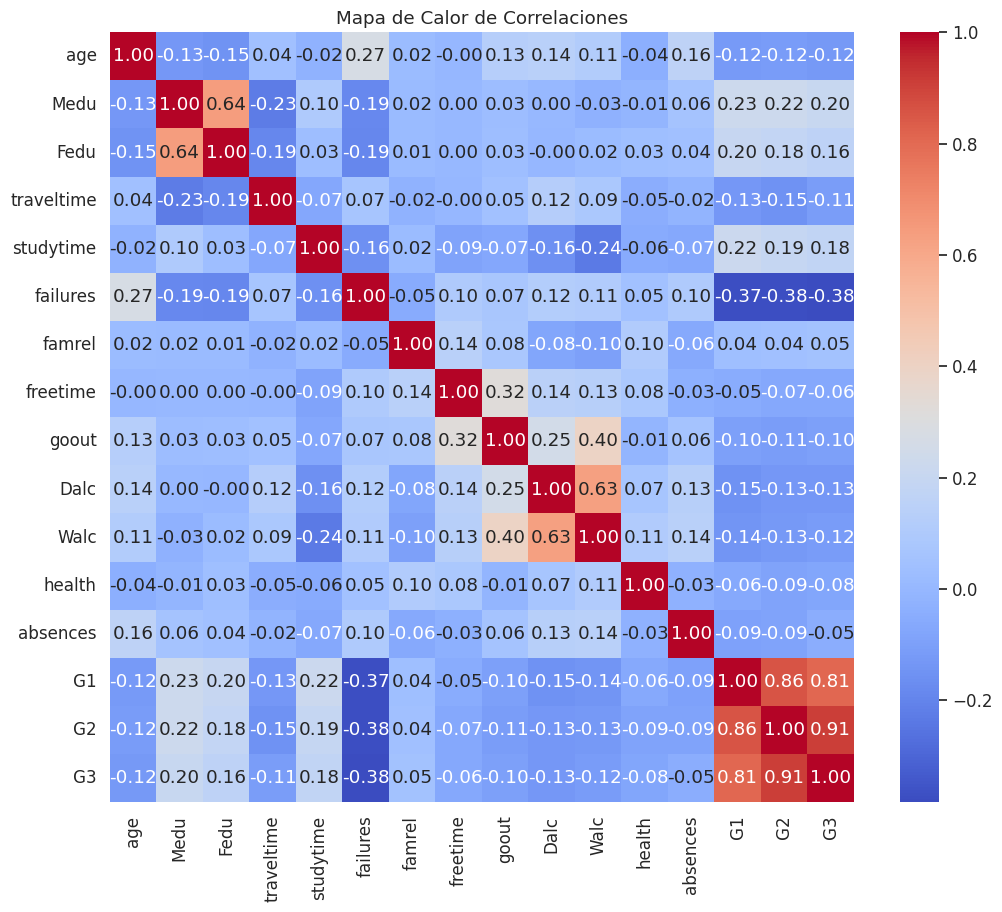

Valores faltantes por columna:
school          0
sex             0
age            31
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime    104
studytime      52
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic        0
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences        0
G1              0
G2              0
G3              0
dtype: int64

Distribución de la variable 'performance':
performance
alto    814
bajo    230
Name: count, dtype: int64

Tamaño del conjunto de entrenamiento: (730, 30)
Tamaño del conjunto de prueba: (314, 30)

Reporte de clasificación - Regresión Logística:
              precision    recall  f1-score   support

        alto       0.82      0.96      0.88       245
        

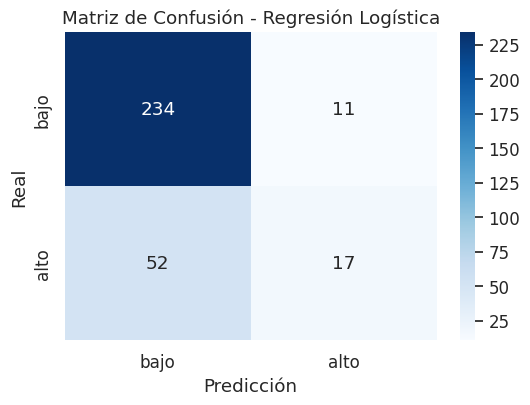


Reporte de clasificación - Random Forest:
              precision    recall  f1-score   support

        alto       0.82      0.92      0.87       245
        bajo       0.51      0.29      0.37        69

    accuracy                           0.78       314
   macro avg       0.67      0.61      0.62       314
weighted avg       0.75      0.78      0.76       314



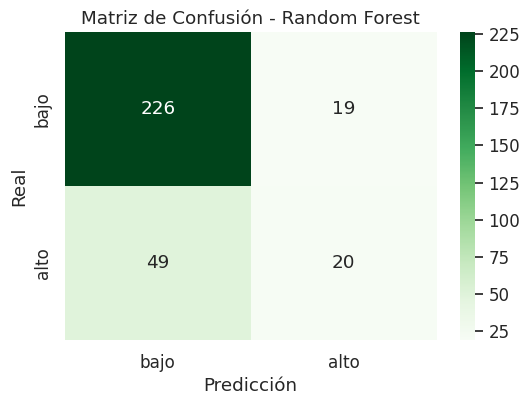

Accuracy Regresión Logística: 79.94%
Accuracy Random Forest: 78.34%


In [4]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importar librerías para Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Modelos de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Evaluación de modelos
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Configuración de gráficos
sns.set_style("whitegrid")
sns.set(font_scale=1.1)

# Cargar el dataset
data = pd.read_csv("Student Alcohol Consumption_TF.csv")
print("Primeras filas del dataset:")
print(data.head())
print("\nResumen de variables:")
print(data.info())
print("\nEstadísticas descriptivas:")
print(data.describe())

# -----------------------
# Visualización exploratoria
# -----------------------

# 1. Box Plot para la nota final (G3)
plt.figure(figsize=(8,6))
sns.boxplot(y=data['G3'])
plt.title("Box Plot de la Nota Final (G3)")
plt.ylabel("G3")
plt.show()

# 2. Violin Plot de G3 por sexo para detectar diferencias en la distribución
plt.figure(figsize=(8,6))
sns.violinplot(x='sex', y='G3', data=data)
plt.title("Violin Plot de la Nota Final (G3) por Sexo")
plt.xlabel("Sexo")
plt.ylabel("G3")
plt.show()

# 3. Mapa de calor con la matriz de correlaciones entre variables numéricas
plt.figure(figsize=(12,10))
# Select only numeric columns before calculating correlation
numeric_data = data.select_dtypes(include=np.number)
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mapa de Calor de Correlaciones")
plt.show()

# -----------------------
# Limpieza y preparación de los datos
# -----------------------
# Revisar valores faltantes
print("Valores faltantes por columna:")
print(data.isnull().sum())

# Crear variable objetivo.
# En este ejemplo se define "alto" si la nota final (G3) es >= 10, "bajo" en caso contrario.
data['performance'] = data['G3'].apply(lambda x: 'alto' if x >= 10 else 'bajo')

print("\nDistribución de la variable 'performance':")
print(data['performance'].value_counts())

# Definir la variable a predecir y las características.
# Para evitar fuga de información se eliminan G1, G2 y G3.
features = data.drop(['G1', 'G2', 'G3', 'performance'], axis=1)
target = data['performance']

# Separate features into numerical and categorical columns
numeric_features = features.select_dtypes(include=np.number).columns
categorical_features = features.select_dtypes(include='object').columns

# Create preprocessing pipelines for numerical and categorical features
# Numerical pipeline: Impute missing values with the mean and scale features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Categorical pipeline: Impute missing values with a constant and one-hot encode
# We use 'most_frequent' strategy for simplicity, but you might choose a constant value
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))])

# Combine preprocessing pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# -----------------------
# Separar conjunto de entrenamiento y prueba
# -----------------------
from sklearn.model_selection import train_test_split

# Note: We split the original features BEFORE applying the full preprocessing pipeline
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=target)
print("\nTamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


# -----------------------
# Modelado de Machine Learning Supervisado
# Modelos: Regresión Logística y Random Forest
# -----------------------

# Modelo 1: Regresión Logística
# Create a pipeline that first preprocesses the data and then fits the Logistic Regression model
logreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', LogisticRegression(max_iter=1000))])

# Fit the pipeline on the training data
logreg_pipeline.fit(X_train, y_train)
y_pred_log = logreg_pipeline.predict(X_test)

print("\nReporte de clasificación - Regresión Logística:")
print(classification_report(y_test, y_pred_log))

# Plot de Matriz de Confusión para Regresión Logística
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6,4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap='Blues',
            xticklabels=['bajo', 'alto'], yticklabels=['bajo', 'alto'])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

# Modelo 2: Random Forest
# Create a pipeline for Random Forest as well
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Fit the Random Forest pipeline
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)


print("\nReporte de clasificación - Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Plot de Matriz de Confusión para Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap='Greens',
            xticklabels=['bajo', 'alto'], yticklabels=['bajo', 'alto'])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Random Forest")
plt.show()

# Comparación de la precisión de cada modelo
acc_log = accuracy_score(y_test, y_pred_log)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("Accuracy Regresión Logística: {:.2f}%".format(acc_log*100))
print("Accuracy Random Forest: {:.2f}%".format(acc_rf*100))

Primeras 5 filas del dataset:
  school sex   age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F  18.0       U     GT3       A     4     4  at_home   teacher   
1     GP   F  17.0       U     GT3       T     1     1  at_home     other   
2     GP   F  15.0       U     LE3       T     1     1  at_home     other   
3     GP   F  15.0       U     GT3       T     4     2   health  services   
4     GP   F  16.0       U     GT3       T     3     3    other     other   

   ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0  ...      4        3      4     1     1      3        6   5   6   6  
1  ...      5        3      3     1     1      3        4   5   5   6  
2  ...      4        3      2     2     3      3       10   7   8  10  
3  ...      3        2      2     1     1      5        2  15  14  15  
4  ...      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

Resumen estadístico:
               age         Med

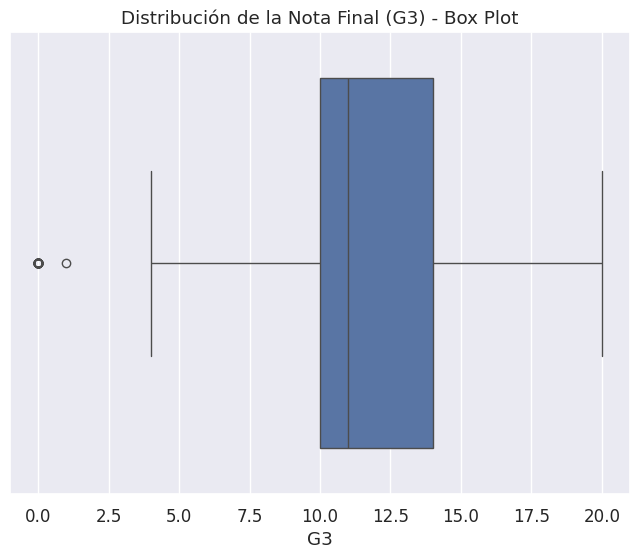

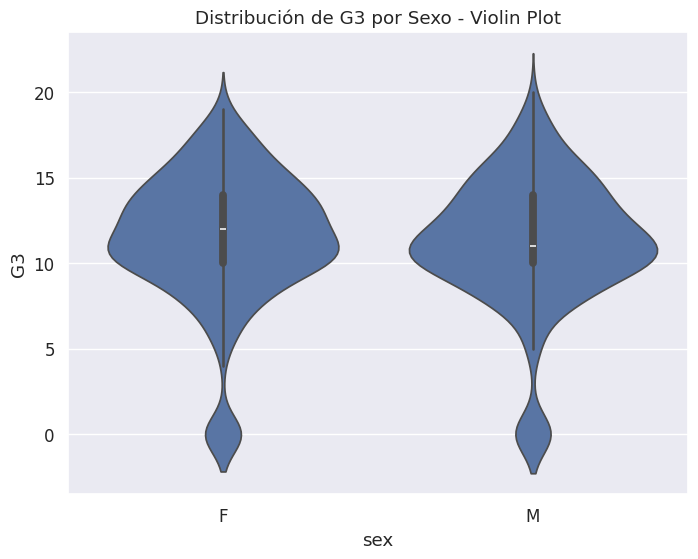

Valores faltantes por columna:
school          0
sex             0
age            31
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime    104
studytime      52
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic        0
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences        0
G1              0
G2              0
G3              0
dtype: int64


<ipython-input-5-2344436903>:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
<ipython-input-5-2344436903>:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

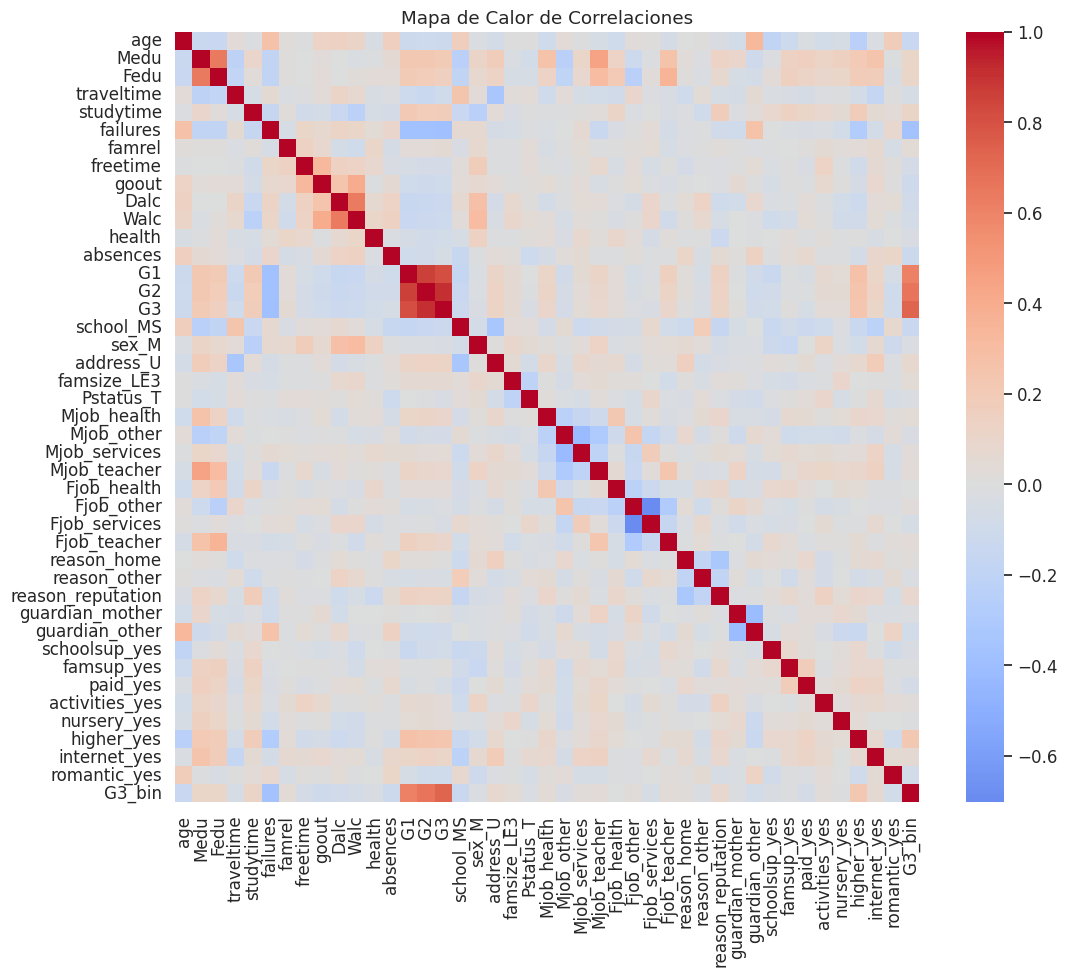

Correlaciones con G3_bin:
G3_bin               1.000000
G3                   0.729693
G2                   0.666289
G1                   0.613927
higher_yes           0.218430
studytime            0.115451
Medu                 0.106460
Fedu                 0.105579
reason_reputation    0.084912
address_U            0.073732
Name: G3_bin, dtype: float64
Regresión Logística:
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        60
           1       0.88      0.97      0.92       149

    accuracy                           0.88       209
   macro avg       0.88      0.82      0.84       209
weighted avg       0.88      0.88      0.87       209

Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        60
           1       0.88      0.97      0.92       149

    accuracy                           0.88       209
   macro avg       0.88      0.82      0.84       209
weighted a

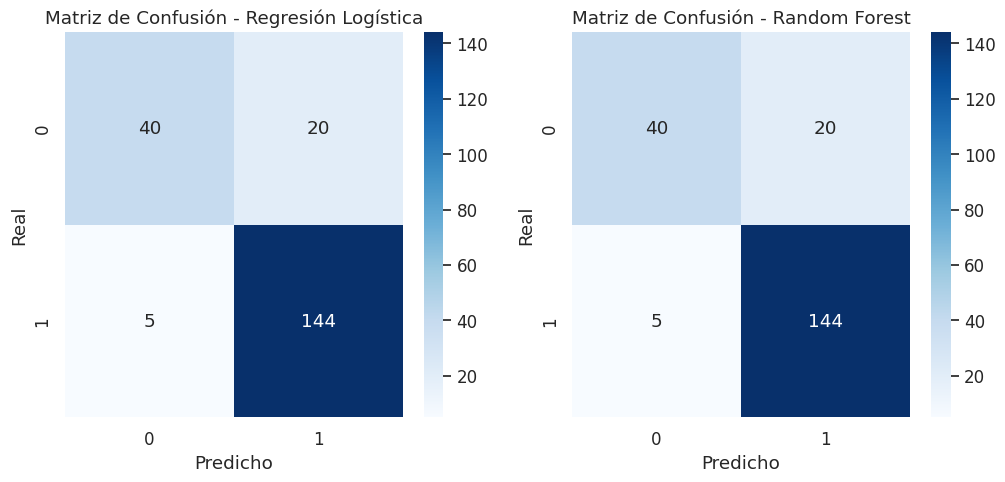

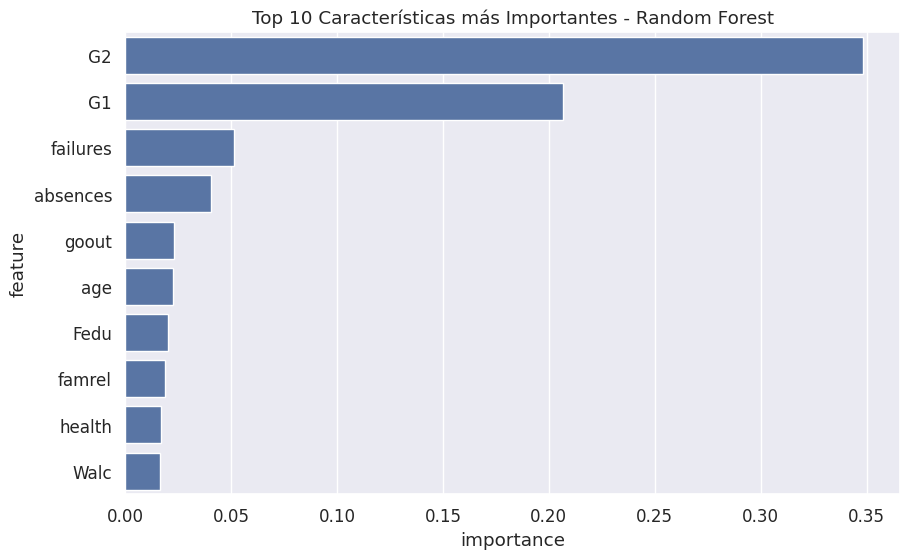

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Cargar el dataset
df = pd.read_csv('Student Alcohol Consumption_TF.csv')

# Exploración inicial
print("Primeras 5 filas del dataset:")
print(df.head())
print("\nResumen estadístico:")
print(df.describe())
print("\nInformación del dataset:")
print(df.info())

# Gráficos exploratorios
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['G3'])
plt.title('Distribución de la Nota Final (G3) - Box Plot')
plt.show()

plt.figure(figsize=(8, 6))
sns.violinplot(x='sex', y='G3', data=df)
plt.title('Distribución de G3 por Sexo - Violin Plot')
plt.show()

# Limpieza de datos
print("Valores faltantes por columna:")
print(df.isnull().sum())

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        df[column].fillna(df[column].median(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

# Codificación de variables categóricas
categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
                    'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
                    'nursery', 'higher', 'internet', 'romantic']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Escalado de variables numéricas
scaler = StandardScaler()
numeric_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
                'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Binarizar G3
df['G3_bin'] = (df['G3'] >= 10).astype(int)

# Mapa de calor de correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

# Correlación con G3_bin
corr = df.corr()['G3_bin'].sort_values(ascending=False)
print("Correlaciones con G3_bin:")
print(corr.head(10))

# División del dataset
X = df.drop(['G3', 'G3_bin'], axis=1)
y = df['G3_bin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regresión Logística
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluación
print("Regresión Logística:")
print(classification_report(y_test, y_pred_logreg))
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Matrices de confusión
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Predicho')
plt.ylabel('Real')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# Importancia de características en Random Forest
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10))
plt.title('Top 10 Características más Importantes - Random Forest')
plt.show()

In [7]:
import pandas as pd

# Cargar el dataset proporcionado
file_path = 'Student Alcohol Consumption_TF.csv'
data = pd.read_csv(file_path)

# Mostrar las primeras filas y la información general del dataset
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      1044 non-null   object 
 1   sex         1044 non-null   object 
 2   age         1013 non-null   float64
 3   address     1044 non-null   object 
 4   famsize     1044 non-null   object 
 5   Pstatus     1044 non-null   object 
 6   Medu        1044 non-null   int64  
 7   Fedu        1044 non-null   int64  
 8   Mjob        1044 non-null   object 
 9   Fjob        1044 non-null   object 
 10  reason      1044 non-null   object 
 11  guardian    1044 non-null   object 
 12  traveltime  940 non-null    float64
 13  studytime   992 non-null    float64
 14  failures    1044 non-null   int64  
 15  schoolsup   1044 non-null   object 
 16  famsup      1044 non-null   object 
 17  paid        1044 non-null   object 
 18  activities  1044 non-null   object 
 19  nursery     1044 non-null  

(None,
   school sex   age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
 0     GP   F  18.0       U     GT3       A     4     4  at_home   teacher   
 1     GP   F  17.0       U     GT3       T     1     1  at_home     other   
 2     GP   F  15.0       U     LE3       T     1     1  at_home     other   
 3     GP   F  15.0       U     GT3       T     4     2   health  services   
 4     GP   F  16.0       U     GT3       T     3     3    other     other   
 
    ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
 0  ...      4        3      4     1     1      3        6   5   6   6  
 1  ...      5        3      3     1     1      3        4   5   5   6  
 2  ...      4        3      2     2     3      3       10   7   8  10  
 3  ...      3        2      2     1     1      5        2  15  14  15  
 4  ...      4        3      2     1     2      5        4   6  10  10  
 
 [5 rows x 33 columns])

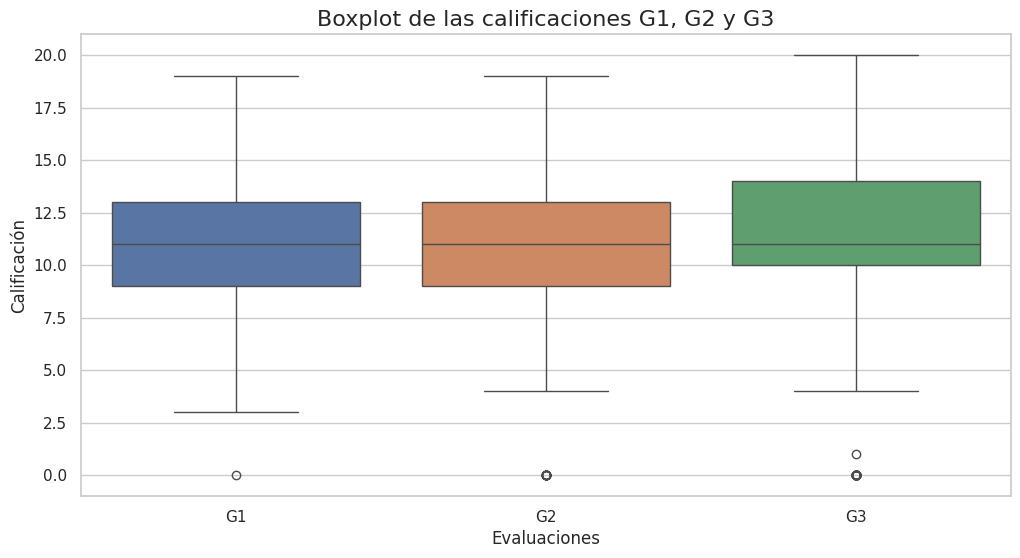

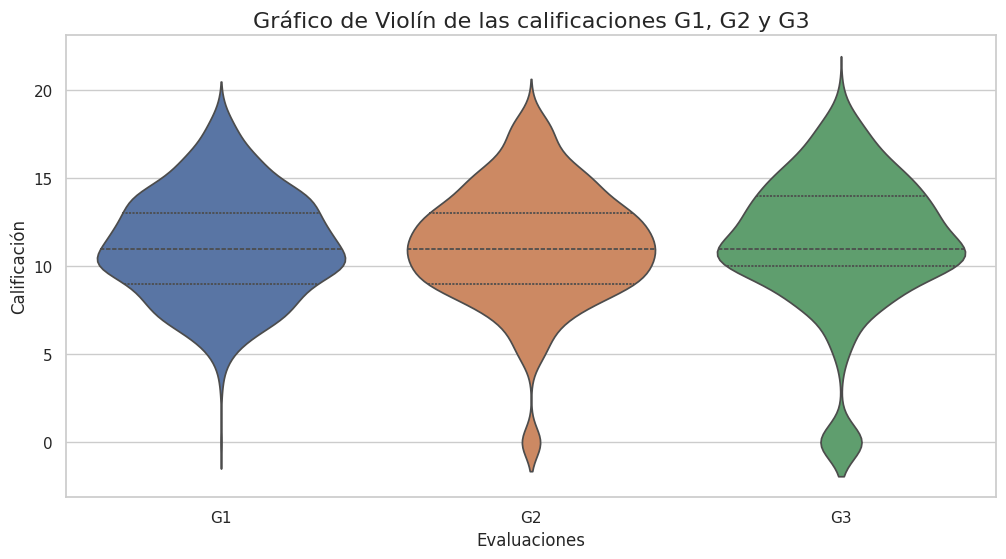

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo para gráficos
sns.set(style="whitegrid")

# Gráfico Boxplot de las calificaciones G1, G2, G3
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['G1', 'G2', 'G3']])
plt.title('Boxplot de las calificaciones G1, G2 y G3', fontsize=16)
plt.ylabel('Calificación', fontsize=12)
plt.xlabel('Evaluaciones', fontsize=12)
plt.show()

# Gráfico de Violín de las calificaciones G1, G2, G3
plt.figure(figsize=(12, 6))
sns.violinplot(data=data[['G1', 'G2', 'G3']], inner="quartile")
plt.title('Gráfico de Violín de las calificaciones G1, G2 y G3', fontsize=16)
plt.ylabel('Calificación', fontsize=12)
plt.xlabel('Evaluaciones', fontsize=12)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

# --- 1. Carga y Evaluación Inicial de Datos ---
# Cargar el dataset
try:
    df = pd.read_csv('Student Alcohol Consumption_TF.csv')
except FileNotFoundError:
    print("Error: El archivo 'Student Alcohol Consumption_TF.csv' no se encontró. Asegúrate de que esté en el mismo directorio.")
    exit()

print("--- Evaluación Inicial del Dataset ---")
print("Primeras 5 filas del dataset:")
print(df.head())
print("\nInformación general del dataset:")
df.info()
print("\nValores nulos antes de la imputación:")
print(df.isnull().sum())

# --- 2. Manejo de Valores Faltantes ---
# Convertir columnas a numérico, forzando NaN para errores
# Esto es crucial porque el dataset puede tener valores vacíos que Pandas no reconoce como NaN por defecto.
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['traveltime'] = pd.to_numeric(df['traveltime'], errors='coerce')
df['studytime'] = pd.to_numeric(df['studytime'], errors='coerce')

# Imputar valores faltantes numéricos con la mediana
# Identificar columnas numéricas con NaN después de la conversión
numeric_cols_with_nan = ['age', 'traveltime', 'studytime']
for col in numeric_cols_with_nan:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Imputado la mediana ({median_val:.2f}) en la columna '{col}'.")

# Imputar valores faltantes categóricos con la moda
# Identificar columnas categóricas con NaN
categorical_cols_with_nan = ['guardian']
for col in categorical_cols_with_nan:
    if df[col].isnull().any():
        mode_val = df[col].mode()
        df[col].fillna(mode_val, inplace=True)
        print(f"Imputado la moda ('{mode_val}') en la columna '{col}'.")

print("\nValores nulos después de la imputación:")
print(df.isnull().sum())

# --- 3. Ingeniería de Características: Binarización de la Variable Objetivo ---
# Binarizar G3: 'alto' (>=10) vs 'bajo' (<10)
df['G3_binary'] = (df['G3'] >= 10).astype(int)
print("\nDistribución de la variable objetivo binarizada (G3_binary):")
print(df['G3_binary'].value_counts())

# --- 4. Exploración Visual del Dataset (Box Plot, Violin Plot, Mapa de Calor) ---
# Identificar características numéricas y categóricas para la exploración
# (Se redefinirán más adelante para el preprocesamiento del modelo)
initial_numerical_features = df.select_dtypes(include=np.number).columns.tolist()
# Excluir G1, G2, G3, G3_binary para el heatmap de correlación si no se desean correlaciones con el target o grades intermedias
# Para el heatmap, usaremos las características numéricas que serán parte de X
numerical_features_for_corr = [col for col in initial_numerical_features if col not in ['G1', 'G2', 'G3', 'G3_binary']]

print("\n--- Exploración Visual del Dataset ---")

# Gráfica de CAJA y BIGOTES (Box Plot) - Ejemplo: Edad vs Rendimiento Binarizado
plt.figure(figsize=(8, 6))
sns.boxplot(x='G3_binary', y='age', data=df, palette='viridis')
plt.title('Box Plot: Edad vs. Rendimiento Académico (Binarizado)')
plt.xlabel('Rendimiento Académico (0: Bajo, 1: Alto)')
plt.ylabel('Edad')
plt.xticks(,)
plt.show()

# Gráfica de VIOLIN - Ejemplo: Ausencias vs Rendimiento Binarizado
plt.figure(figsize=(8, 6))
sns.violinplot(x='G3_binary', y='absences', data=df, palette='magma')
plt.title('Violin Plot: Ausencias vs. Rendimiento Académico (Binarizado)')
plt.xlabel('Rendimiento Académico (0: Bajo, 1: Alto)')
plt.ylabel('Número de Ausencias')
plt.xticks(,)
plt.show()

# Mapa de Calor de Correlación
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_features_for_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de Correlación entre Características Numéricas')
plt.show()


# --- 5. División de Datos para Entrenamiento y Evaluación del Modelo ---
# Definir características (X) y variable objetivo (y)
# G1 y G2 se mantienen como características según el informe
X = df.drop(['G3', 'G3_binary'], axis=1)
y = df['G3_binary']

# Identificar características numéricas y categóricas para el preprocesamiento
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

print(f"\nCaracterísticas numéricas para el modelo: {numerical_features}")
print(f"Características categóricas para el modelo: {categorical_features}")

# Dividir los datos en conjuntos de entrenamiento y prueba (antes del escalado/codificación para evitar data leakage)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nDimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")

# --- Preprocesamiento de datos (escalado y codificación) ---
# Escalar características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

# Codificar características categóricas (One-Hot Encoding)
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

# Crear DataFrames a partir de las características preprocesadas para mantener los nombres de las columnas
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_features, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_features, index=X_test.index)

X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_features), index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_features), index=X_test.index)

# Concatenar características numéricas escaladas y categóricas codificadas
X_train_processed = pd.concat([X_train_scaled_df, X_train_encoded_df], axis=1)
X_test_processed = pd.concat([X_test_scaled_df, X_test_encoded_df], axis=1)

print(f"\nDimensiones de X_train_processed después del preprocesamiento: {X_train_processed.shape}")
print(f"Dimensiones de X_test_processed después del preprocesamiento: {X_test_processed.shape}")

# --- 6. Implementación y Evaluación de Modelos ---

# --- Modelo 1: Regresión Logística ---
print("\n--- Modelo: Regresión Logística ---")
log_reg_model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)
log_reg_model.fit(X_train_processed, y_train)
y_pred_lr = log_reg_model.predict(X_test_processed)
y_prob_lr = log_reg_model.predict_proba(X_test_processed)[:, 1]

# Métricas de evaluación
print("\nInforme de Clasificación (Regresión Logística):")
print(classification_report(y_test, y_pred_lr, target_names=))
print(f"Precisión Global (Regresión Logística): {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"AUC-ROC (Regresión Logística): {roc_auc_score(y_test, y_prob_lr):.4f}")

# Matriz de Confusión
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=, yticklabels=)
plt.title('Matriz de Confusión (Regresión Logística)')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Curva ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
plt.figure(figsize=(6, 5))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc_score(y_test, y_prob_lr):.2f})')
plt.plot(, , color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (Regresión Logística)')
plt.legend(loc="lower right")
plt.show()

# --- Modelo 2: Clasificador Random Forest ---
print("\n--- Modelo: Clasificador Random Forest ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_processed, y_train)
y_pred_rf = rf_model.predict(X_test_processed)
y_prob_rf = rf_model.predict_proba(X_test_processed)[:, 1]

# Métricas de evaluación
print("\nInforme de Clasificación (Clasificador Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=))
print(f"Precisión Global (Clasificador Random Forest): {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"AUC-ROC (Clasificador Random Forest): {roc_auc_score(y_test, y_prob_rf):.4f}")

# Matriz de Confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=, yticklabels=)
plt.title('Matriz de Confusión (Clasificador Random Forest)')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Curva ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(6, 5))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})')
plt.plot(, , color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (Clasificador Random Forest)')
plt.legend(loc="lower right")
plt.show()

# Importancia de las Características (Random Forest)
print("\n--- Importancia de las Características (Clasificador Random Forest) ---")
feature_importances = rf_model.feature_importances_
feature_names = X_train_processed.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df.head(10)) # Mostrar las 10 características más importantes

# Visualización de la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Características Más Importantes (Random Forest)')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()